In [4]:
import copy, math, pickle
from itertools import combinations
from scipy.special import comb
import numpy as np

from qiskit_aer import Aer
from qiskit.quantum_info import Pauli
from qiskit.quantum_info import Statevector, Operator
from qiskit.primitives import StatevectorEstimator
from qiskit import transpile, QuantumCircuit

import randon_unitary as ru

In [118]:
qubit_num = 6
depth = 3
state = Statevector.from_label("000000")
S = [1, 2, 3, 4]
observable = Pauli("ZZZZZZ")

In [88]:
shots = 1
circ, U_lst = ru.zig_zag_QuantumNet_Circ(qubit_num, depth, state)

simulator = Aer.get_backend("qasm_simulator")
# state_simulator = Aer.get_backend("statevector_simulator")
expval_simulator = StatevectorEstimator()

compiled_circuit = transpile(circ, simulator)
counts = simulator.run(compiled_circuit, shots=shots).result().get_counts()
print(counts)
expval = 0

for b in counts:
    frequency = counts[b] / shots
    U_lst_copy = copy.deepcopy(U_lst)
    circ_inv = ru.circuit_inverse(qubit_num, depth, b, U_lst_copy)
    data = expval_simulator.run([(circ_inv, observable)]).result()[0].data
    expval += frequency * data.evs
print(expval)

{'0001': 1}
1.0000000000000027


In [81]:
import KiteavChain as kc

shots = 128

b_lst = []
U_lst_lst = []
for _ in range(shots):
    b, U_lst = kc.random_match_circuit(qubit_num, depth, state)
    b_lst.append(b)
    U_lst_lst.append(U_lst)

In [89]:
expval_simulator = StatevectorEstimator()
expectation_value = 0

for b, U_lst in zip(b_lst, U_lst_lst):
    # Create the combined unitary UUi using the function f
    # print("b: ", b)
    U_lst_copy = copy.deepcopy(U_lst)
    circ_inv = ru.circuit_inverse(qubit_num, depth, b, U_lst_copy)
    data = expval_simulator.run([(circ_inv, observable)]).result()[0].data
    expectation_value += data.evs
expectation_value = expectation_value / len(b_lst)
print(expectation_value)

1.0000000000000009


In [85]:
U_lstlst_copy = copy.deepcopy(U_lst_lst)
expval = 0
for i in range(shots):
    # frequency = counts[b] / shots
    U_lst = U_lstlst_copy[i]
    circ_inv = ru.circuit_inverse(qubit_num, depth, b_lst[i], U_lst)
    data = expval_simulator.run([(circ_inv, observable)]).result()[0].data
    expval += data.evs
print(expval/shots)

1.0000000000000009


In [86]:
import experiment

shots = 128
res1 = experiment.random_match_circuit(qubit_num, depth, state, observable, shots)
res2 = experiment.expval_theory(qubit_num, state, observable)
res3 = experiment.experiment(qubit_num, depth, state, observable, shots)
print(res1, res2, res3/experiment.alpha_k(S, depth, qubit_num, k_max=3)) 

1.0000000000000024 1.0 6.997467963563674


In [ ]:
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
circ_inv = ru.circuit_inverse(qubit_num, depth, "1111", [CNOT, CNOT])


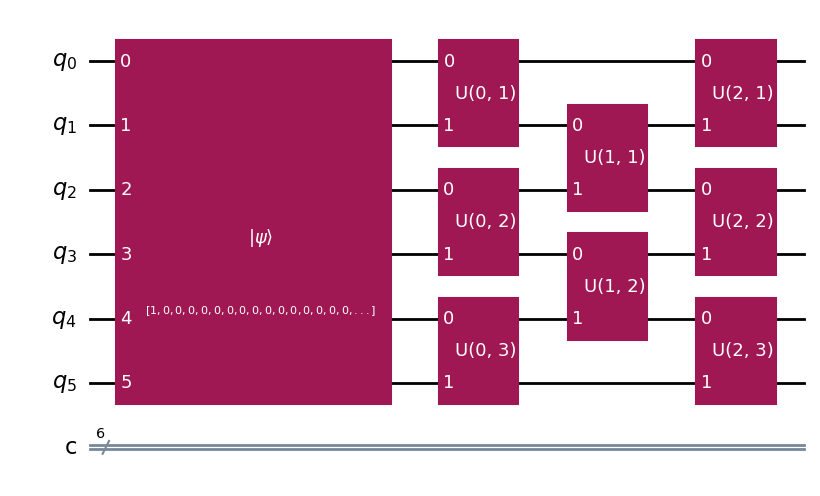

In [119]:
from qiskit import QuantumCircuit
from randon_unitary import random_FGUclifford, custom_Matrix_Add

qc = QuantumCircuit(qubit_num, qubit_num)
qc.initialize(state, range(qubit_num))
U_lst = []
# 添加 U_theta
for j in range(depth):
    if j % 2 == 0:
        for i in range(qubit_num // 2):
            _, U = random_FGUclifford(2, ret_unitary=True)
            U_lst.append(U)
            qc = custom_Matrix_Add(
                U, qc, [i * 2, i * 2 + 1], label="U{}".format((j, i + 1))
            )
    else:
        for i in range(qubit_num // 2 - 1):
            _, U = random_FGUclifford(2, ret_unitary=True)
            U_lst.append(U)
            qc = custom_Matrix_Add(
                U, qc, [i * 2 + 1, i * 2 + 2], label="U{}".format((j, i + 1))
            )
qc.draw('mpl')





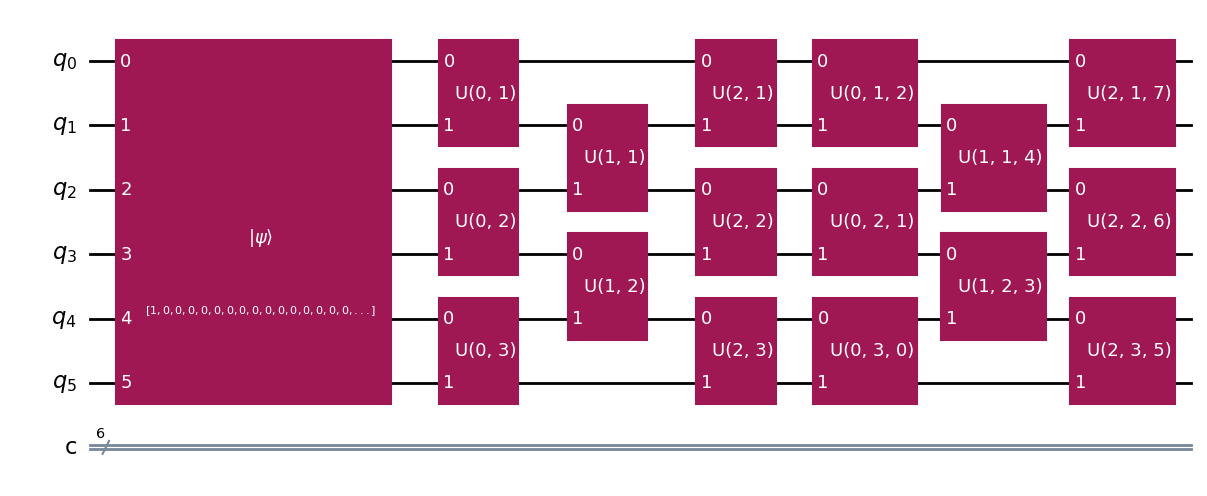

In [120]:
counts = 0
for j in range(depth):
    if j % 2 == (depth + 1) % 2:
        for i in range(qubit_num // 2-1, -1, -1):
            U = U_lst.pop()
            qc = custom_Matrix_Add(
                U.conj().T, qc, [i * 2, i * 2 + 1], label="U{}".format((j, i + 1, counts))
            )
            counts += 1
    else:
        for i in range(qubit_num // 2 - 2, -1, -1):
            U = U_lst.pop()
            qc = custom_Matrix_Add(
                U.conj().T,
                qc,
                [i * 2 + 1, i * 2 + 2],
                label="U{}".format((j, i + 1, counts)),
            )
            counts += 1

simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

# 获取最终的量子态
final_state = result.get_statevector(qc)
qc.draw('mpl')

In [121]:
np.set_printoptions(suppress=True, precision=2)
print("Final statevector:")
print(final_state)

Final statevector:
Statevector([ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j, -0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j,
              0.+0.j,  0.+0.j, -0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,
             -0.-0.j],
            dims=(2, 2, 2, 2, 2, 2))


In [97]:
a = list(range(1, 5))
a.pop()

4

In [122]:
def example_function(a, b, c=10, *args, d, e=20, **kwargs):
    print(f"a: {a}, b: {b}, c: {c}")
    print(f"args: {args}")
    print(f"d: {d}, e: {e}")
    print(f"kwargs: {kwargs}")

# 调用函数
example_function(1, 2, 3, 4, 5, d='hello', f='world')

a: 1, b: 2, c: 3
args: (4, 5)
d: hello, e: 20
kwargs: {'f': 'world'}


In [3]:
import numpy as np
np.zeros(3,4)


TypeError: Cannot interpret '4' as a data type